# Model Evaluation

There are four different model structures: single, default, with dropout and with batch norm.

The model with single hidden layer:
```
model: [
    Linear(128, 90),
    Activation('relu'),
    Linear(90, 10),
    Activation('tanh'),
]
```

The default model:
```
model: [
    Linear(128, 80),
    Activation('relu'),
    Linear(80, 40),
    Activation('relu'),
    Linear(40, 10),
    Activation('tanh'),
]
```

The model with dropout layer:
```
model: [
    Linear(128, 80),
    Activation('relu'),
    Linear(80, 40),
    Activation('relu'),
    Dropout(0.5),
    Linear(40, 10),
    Activation('tanh'),
]
```

The model with batch norm layer:
```
model: [
    Linear(128, 80),
    BatchNorm(80),
    Activation('relu'),
    Linear(80, 40),
    BatchNorm(40),
    Activation('relu'),
    Linear(40, 10),
    BatchNorm(10),
    Activation('tanh'),
]
```

## Ablation Studies Evaluation

Hyperparameters:
- epochs: 50
- criterion: Softmax and CCE Loss
- optimizer: Adam
- learning rate: 0.01
- momentum: 0
- weight decay: 0
- batch sizes: 1

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
models = []
losses = {}
train_accuracies = {}
test_accuracies = {}
time_takens = {}

folder = "../log/ablation-studies-1/"
for file in os.listdir(folder):

    # get the data
    f = open(os.path.join(folder, file), "r")
    all_data = f.readlines()
    f.close()

    # get the time taken
    time_taken = all_data[-2:-1]
    time_taken = float(time_taken[0].strip("\n").split(":")[1].strip("seconds"))

    # split the data into different data
    data = all_data[4:-2]
    loss = np.zeros(len(data))
    train_accuracy = np.zeros(len(data))
    test_accuracy = np.zeros(len(data))
    for i, line in enumerate(data):
        line = line.strip("\n")
        loss[i] = float(line.split(",")[0].split("=")[1])
        train_accuracy[i] = float(line.split(",")[1].split("=")[1].strip("%"))
        test_accuracy[i] = float(line.split(",")[1].split("=")[1].strip("%"))

    # add the data
    file = file.replace('.txt', '').replace('1_log_adam_model=', '')
    models.append(file)
    losses[file] = loss
    train_accuracies[file] = train_accuracy
    test_accuracies[file] = test_accuracy
    time_takens[file] = time_taken

# sort the models
models.sort(key=lambda x: x.replace('1_log_adam_model=', ''))
print(models)

['batchnorm', 'default', 'dropout', 'single']


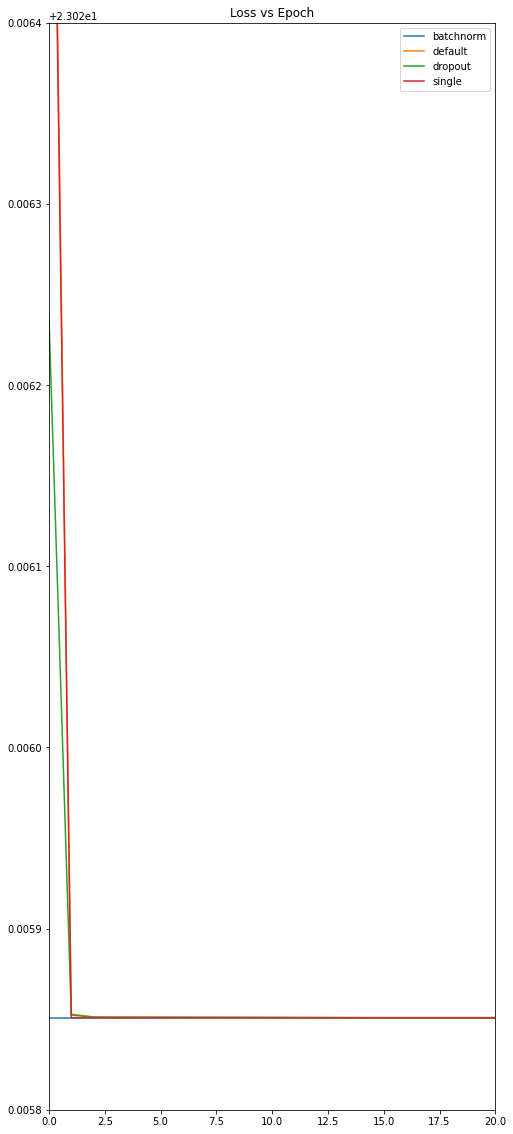

In [12]:
plt.figure(figsize=(8, 20))
plt.title("Loss vs Epoch")
for model in models:
    plt.plot(losses[model], label=model)

plt.ylim((23.0258, 23.0264))
plt.xlim((0, 20))
plt.legend()
plt.show()

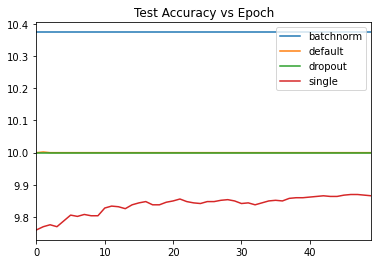

In [13]:
# plt.figure(figsize=(16, 12))
plt.title("Test Accuracy vs Epoch")
for model in models:
    plt.plot(test_accuracies[model], label=model)
plt.xlim((0, 49))
plt.legend()
plt.show()

batchnorm: 10.374%
default: 10.0%
dropout: 10.0%
single: 9.866%


[]

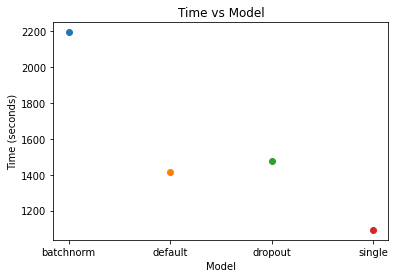

In [17]:
plt.title('Time vs Model')
for model in models:
    plt.scatter(y=time_takens[model], x=model.replace('3_log', ''))
    print(f"{model.replace('3_log', '')}: {test_accuracies[model][-1]}%")

plt.ylabel("Time (seconds)")
plt.xlabel("Model")
plt.plot()